<a href="https://colab.research.google.com/github/AndrewLi19/ML_Assignment/blob/main/Assignment5/my_cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
!git clone https://github.com/AndrewLi19/ML_Assignment

fatal: destination path 'ML_Assignment' already exists and is not an empty directory.


In [172]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [173]:
project_name='Machine Learning #Assignment 6'

In [174]:
data_dir = './ML_Assignment/Assignment5/data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['airplane', 'horse', 'truck', 'frog', 'dog', 'automobile', 'bird', 'ship', 'deer', 'cat']


In [175]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [176]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [177]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [178]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [179]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [180]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  airplane (0)


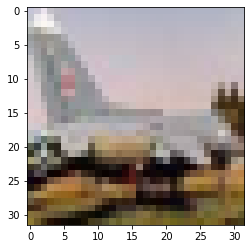

In [181]:
show_example(*dataset[123])

Label:  truck (9)


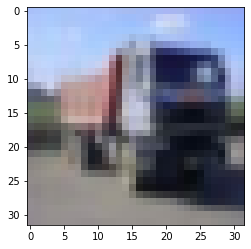

In [182]:
show_example(*dataset[4554])

In [183]:
random_seed = 42
torch.manual_seed(random_seed);

In [184]:
val_size = 500
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(4500, 500)

In [185]:
from torch.utils.data.dataloader import DataLoader

batch_size=64

In [186]:
train_dl=DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)
val_dl=DataLoader(dataset=val_ds, batch_size=batch_size, shuffle=True)

In [187]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

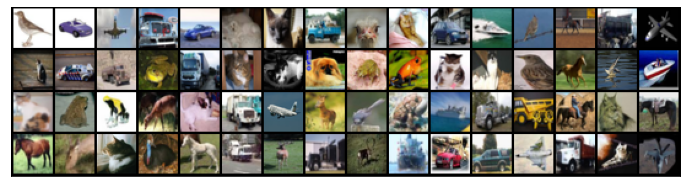

In [188]:
show_batch(train_dl)

In [189]:
def apply_kernel(image, kernel):
    image_size=image.size()
    kernel_size=kernel.size()
    result=torch.zeros(image_size[0]-kernel_size[0]+1,image_size[1]-kernel_size[1]+1)
    for m in range(0,image_size[0]-kernel_size[0]+1):
      for n in range(0,image_size[1]-kernel_size[1]+1):
        for i in range(0,kernel_size[0]):
          for j in range(0,kernel_size[1]):
            result[m,n]=result[m,n]+image[m+i,n+j]*kernel[i,j]
    print(result)
    pass

In [190]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])


In [191]:
import torch.nn as nn
import torch.nn.functional as F

In [192]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

In [193]:
from matplotlib import image
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out=simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([64, 3, 32, 32])
out.shape: torch.Size([64, 8, 16, 16])


In [194]:
class ImageClassificationBase(nn.Module):
  def training_step(self, batch):
    images, labels = batch 
    output=self(images)
    loss=F.cross_entropy(output,labels) 
    return loss
    
  def validation_step(self, batch):
    images, labels = batch
    output=self(images)
    loss=F.cross_entropy(output,labels)
    acc=ImageClassificationBase.accuracy(output,labels)
    return {'val_loss': loss.detach(), 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
  def epoch_end(self, epoch, result):
    print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
        epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
  def accuracy(outputs, labels):
    positive=0
    max=torch.max(outputs,1)[1]
    for i in range(0,len(labels)):
      if max[i]==labels[i]:
        positive=positive+1
    acc=positive/len(labels)
    return torch.tensor(acc)

In [195]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
      super().__init__()
      self.network = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, padding=1), #bs*16*16*16
        nn.ReLU(),
        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

        nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

        nn.Flatten(), 
        nn.Linear(4096,1024),
        nn.ReLU(),
        nn.Linear(1024, 512),
        nn.ReLU(),
        nn.Linear(512,10))
        
    def forward(self, xb):
        return self.network(xb)

In [196]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

images.shape: torch.Size([64, 3, 32, 32])
out.shape: torch.Size([64, 10])
out[0]: tensor([ 0.0216,  0.0084,  0.0179,  0.0287,  0.0110,  0.0346,  0.0009,  0.0255,
        -0.0138, -0.0084], grad_fn=<SelectBackward0>)
MAX tensor(0.0346, grad_fn=<MaxBackward1>)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Label:  automobile (tensor(1))


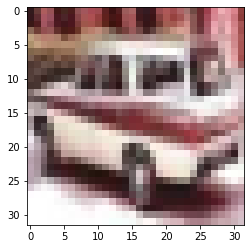

In [197]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    print("MAX",torch.max(out[0]))
    print(dataset.classes)
    show_example(images[0],labels[0])
    break

In [198]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [199]:
device = get_default_device()
device

device(type='cpu')

In [200]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [201]:
@torch.no_grad()
def evaluate(model, val_loader):
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    # Training Phase 
    model.train()
    train_losses = []
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      train_losses.append(loss)
    # Validation phase
    result = evaluate(model, val_loader)
    result['train_loss'] = torch.stack(train_losses).mean().item()
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [202]:
model = to_device(Cifar10CnnModel(), device)

In [203]:
num_epochs = 40
opt_func = torch.optim.Adam
lr = 0.001

In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 2.2462, val_loss: 2.1319, val_acc: 0.2127
Epoch [1], train_loss: 2.0144, val_loss: 1.9808, val_acc: 0.2309
Epoch [2], train_loss: 1.8401, val_loss: 1.7878, val_acc: 0.2891
Epoch [3], train_loss: 1.7048, val_loss: 1.6937, val_acc: 0.3603
Epoch [4], train_loss: 1.5990, val_loss: 1.6318, val_acc: 0.3768
Epoch [5], train_loss: 1.5289, val_loss: 1.6207, val_acc: 0.3833
Epoch [6], train_loss: 1.4265, val_loss: 1.5783, val_acc: 0.4100
